<a href="https://colab.research.google.com/github/RayAKaan/Machine-Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
from tensorflow.keras.datasets.mnist import load_data

In [3]:
#spliting the dataset
(x_train,y_train),(x_test,y_test)=load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


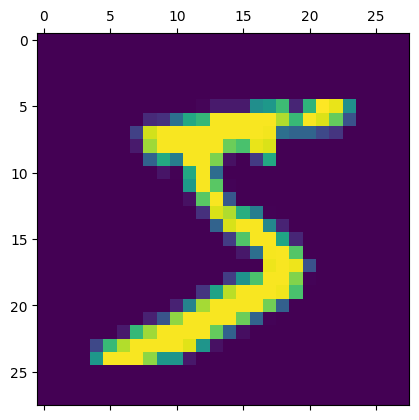

In [4]:
#Visual image
plt.matshow(x_train[0])

In [5]:
#feature scaling
x_train=x_train/255
x_test=x_test/255

In [6]:
#flattening the dataset
X_train=x_train.reshape(len(x_train),28*28)
X_test=x_test.reshape(len(x_test),28*28)

In [55]:
#fitting the model
model=keras.Sequential([
    keras.Input(shape=(784,)),  # ✅ Best practice
    keras.layers.Dense(128, activation='relu'),  # Increased neurons
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8751 - loss: 0.4293
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9663 - loss: 0.1090
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9774 - loss: 0.0728
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9847 - loss: 0.0501
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0397
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.0308
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9914 - loss: 0.0261


In [56]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [57]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [58]:
y_predict=[np.argmax(i)for i in y_pred]
y_predict[:10]

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(9)]

In [59]:
c=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

Text(95.72222222222221, 0.5, 'actual')

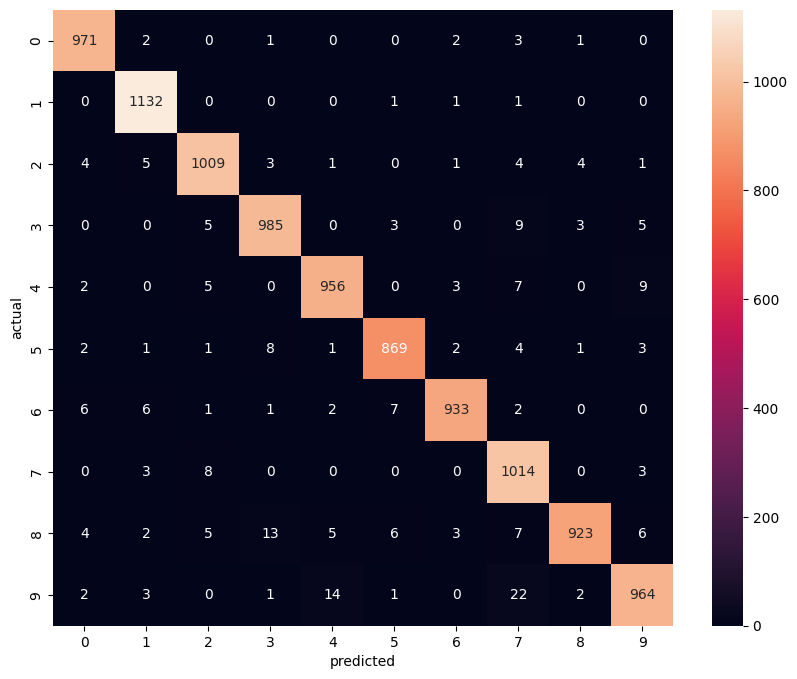

In [60]:
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(c,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')